In [1]:
import numpy as np
from skimage.io import imread, imshow, imsave
from skimage.util import crop
import matplotlib.pylab as plt
import matplotlib.patches as patches

import pandas as pd

In [66]:
# Define some parameters

width = 40 # half_width
height = 40 # half_height

tp = 3

col_X = 'X_' + '%02d' % tp
col_Y = 'Y_' + '%02d' % tp

SAVE_PATH = 'F:\MA\data\Swain_lab\DISCO_result\str515_GFP_006'

image_A = imread('str515_229_raff2_to_gal2_various_exposures_4V_00_str515_GFP_007_tp000003_Brightfield_002.jpg')
mask_A = imread('str515_229_raff2_to_gal2_various_exposures_4V_00_str515_GFP_007_tp000003_Brightfield_002.png')

trap_loc = pd.read_csv('trapLocation_train.csv')

In [58]:
trap_loc

,X_22,Y_22,X_23,Y_23,X_01,Y_01,X_02,Y_02,X_03,Y_03,X_04,Y_04
0,182,258,179,258,146,266,144,268,145,269,147,270
1,364,220,361,220,267,358,265,360,266,361,268,362
2,116,393,113,393,265,447,263,449,264,450,266,451
3,180,347,177,347,393,182,391,184,392,185,394,186
4,300,439,297,439,214,42,212,44,213,45,215,46
5,58,345,55,345,271,179,269,181,270,182,272,183
6,184,169,181,169,86,307,84,309,85,310,87,311
7,426,263,423,263,457,136,455,138,456,139,458,140
8,118,304,115,304,144,355,142,357,143,358,145,359
9,61,166,58,166,331,312,329,314,330,315,332,316


In [59]:
trap_loc[trap_loc < 40].isna().sum()

X_22    35
Y_22    33
X_23    35
Y_23    33
X_01    35
Y_01    34
X_02    35
Y_02    35
X_03    35
Y_03    35
X_04    35
Y_04    35
dtype: int64

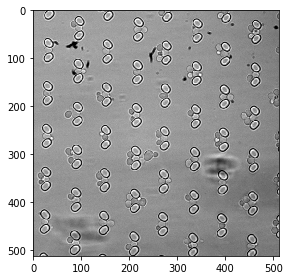

In [60]:
imshow(image_A)

In [61]:
center_X = trap_loc[col_X].iloc[1].copy()-1
center_Y = trap_loc[col_Y].iloc[1].copy()-1

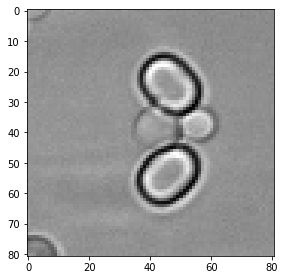

In [62]:
imshow(image_A[center_Y-height:center_Y+height+1, center_X-width:center_X+width+1])

In [67]:
# Save image and result for DISCO
for i in range(trap_loc.shape[0]):
    IMG_NAME = SAVE_PATH + '\\train_img\\img_07_TP' + '%02d' % tp + '_' + '%02d' % (i+1) + '.jpg'
    MASK_NAME = SAVE_PATH + '\\train_mask\\mask_07_TP' + '%02d' % tp + '_' + '%02d' % (i+1) + '.png'
    center_X = trap_loc[col_X].iloc[i].copy()-1
    center_Y = trap_loc[col_Y].iloc[i].copy()-1
    #print(IMG_NAME)
    #print(MASK_NAME)
    #print(i)
    
    if (center_Y-height >= 0) and (center_Y+height+1 <= 512) and (center_X-width >= 0) and (center_X+width+1 <= 512):
        imsave(IMG_NAME, image_A[center_Y-height:center_Y+height+1, center_X-width:center_X+width+1])
        imsave(MASK_NAME, mask_A[center_Y-height:center_Y+height+1, center_X-width:center_X+width+1])

In [40]:
# Save result for CellSerpent
for i in range(trap_loc.shape[0]):
    RES_NAME = SAVE_PATH + '\cellserpent_res\\res_TP' + '%02d' % tp + '_' + '%02d' % (i+1) + '.png'
    center_X = trap_loc[col_X].iloc[i].copy()-1
    center_Y = trap_loc[col_Y].iloc[i].copy()-1
    
    if (center_Y-height >= 0) and (center_Y+height+1 <= 512) and (center_X-width >= 0) and (center_X+width+1 <= 512):
        imsave(RES_NAME, mask_A[center_Y-height:center_Y+height+1, center_X-width:center_X+width+1])